In [1]:
# get the latest h5pyd package
import sys
!{sys.executable} -m pip install git+https://git@github.com/HDFGroup/h5pyd --upgrade

  Cloning https://git@github.com/HDFGroup/h5pyd to /tmp/pip-9mfc5jvj-build
Requirement already up-to-date: numpy>=1.10.4 in /opt/conda/lib/python3.6/site-packages (from h5pyd==0.4.2)
Requirement already up-to-date: requests in /opt/conda/lib/python3.6/site-packages (from h5pyd==0.4.2)
Requirement already up-to-date: six in /opt/conda/lib/python3.6/site-packages (from h5pyd==0.4.2)
Requirement already up-to-date: pytz in /opt/conda/lib/python3.6/site-packages (from h5pyd==0.4.2)
Requirement already up-to-date: urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1 in /opt/conda/lib/python3.6/site-packages (from requests->h5pyd==0.4.2)
Requirement already up-to-date: idna<2.9,>=2.5 in /opt/conda/lib/python3.6/site-packages (from requests->h5pyd==0.4.2)
Requirement already up-to-date: chardet<3.1.0,>=3.0.2 in /opt/conda/lib/python3.6/site-packages (from requests->h5pyd==0.4.2)
Requirement already up-to-date: certifi>=2017.4.17 in /opt/conda/lib/python3.6/site-packages (from requests->h5pyd==0.4.2)
  Fou

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import h5pyd
import h5netcdf

In [3]:
# should show 0.4.2 or greater
h5pyd.version.version
# xr.show_versions()  # xarray should be 0.10.8

'0.4.2'

In [4]:
# open the dataset using xarray
# with engine='h5netcdf', xarray will use Kita Lab server to access the data
lab_url = "http://hsdshdflab.hdfgroup.org"
filename = "tasmax_day_BCSD_rcp85_r1i1p1_inmcm4_2100.nc"
filepath = "/shared/NASA/" + filename
print(lab_url + filepath)
ds = xr.open_dataset(lab_url + filepath, engine="h5netcdf")

http://hsdshdflab.hdfgroup.org/shared/NASA/tasmax_day_BCSD_rcp85_r1i1p1_inmcm4_2100.nc


In [5]:
ds

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 365)
Coordinates:
  * lat      (lat) float32 -89.875 -89.625 -89.375 -89.125 -88.875 -88.625 ...
  * lon      (lon) float32 0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875 ...
  * time     (time) datetime64[ns] 2100-01-01T12:00:00 2100-01-02T12:00:00 ...
Data variables:
    tasmax   (time, lat, lon) float32 ...
Attributes:
    parent_experiment:              historical
    parent_experiment_id:           historical
    parent_experiment_rip:          r1i1p1
    Conventions:                    CF-1.4
    institution:                    NASA Earth Exchange, NASA Ames Research C...
    institute_id:                   NASA-Ames
    realm:                          atmos
    modeling_realm:                 atmos
    version:                        1.0
    downscalingModel:               BCSD
    experiment_id:                  rcp85
    frequency:                      day
    realization:                    [1]
    initialization_meth

In [6]:
ds['tasmax']

<xarray.DataArray 'tasmax' (time: 365, lat: 720, lon: 1440)>
[378432000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.875 -89.625 -89.375 -89.125 -88.875 -88.625 ...
  * lon      (lon) float32 0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875 ...
  * time     (time) datetime64[ns] 2100-01-01T12:00:00 2100-01-02T12:00:00 ...
Attributes:
    time:              [32850.5]
    standard_name:     air_temperature
    long_name:         Daily Maximum Near-Surface Air Temperature
    comment:           daily-maximum near-surface (usually, 2 meter) air temp...
    units:             K
    original_name:     tasmax
    cell_methods:      time: maximum (interval: 1 day)
    cell_measures:     area: areacella
    history:           2010-10-25T09:20:20Z altered by CMOR: Treated scalar d...
    coordinates:       height
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [7]:
%time arr = ds['tasmax'][0]

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.16 ms


In [8]:
arr

<xarray.DataArray 'tasmax' (lat: 720, lon: 1440)>
[1036800 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.875 -89.625 -89.375 -89.125 -88.875 -88.625 ...
  * lon      (lon) float32 0.125 0.375 0.625 0.875 1.125 1.375 1.625 1.875 ...
    time     datetime64[ns] 2100-01-01T12:00:00
Attributes:
    time:              [32850.5]
    standard_name:     air_temperature
    long_name:         Daily Maximum Near-Surface Air Temperature
    comment:           daily-maximum near-surface (usually, 2 meter) air temp...
    units:             K
    original_name:     tasmax
    cell_methods:      time: maximum (interval: 1 day)
    cell_measures:     area: areacella
    history:           2010-10-25T09:20:20Z altered by CMOR: Treated scalar d...
    coordinates:       height
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [9]:
# temp fix for issue noted in: https://github.com/SciTools/cartopy/issues/1120
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

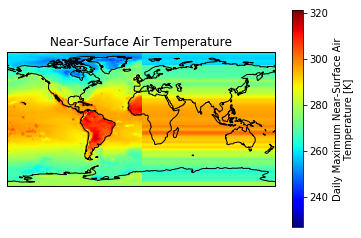

In [10]:
ax = plt.axes(projection=ccrs.PlateCarree())
arr.plot(cmap='jet')
ax.coastlines()
plt.title('Near-Surface Air Temperature');

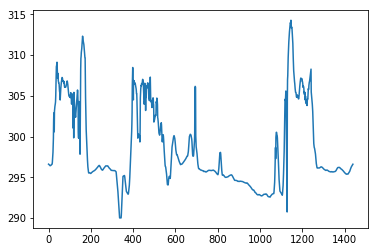

In [11]:
# the map above is not rendering correctly for the right side, but data is correct
# The following xy plot shows that the values on the right side aren't actually constant
arr = ds['tasmax'][0, 360, :]
x = range(len(arr))
plt.plot(x, arr)

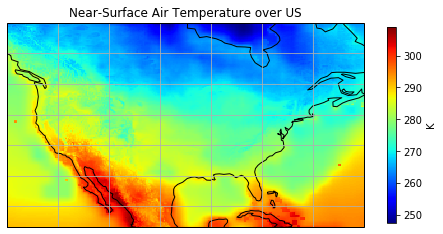

In [12]:
plt.figure(figsize=[8, 6])
ax = plt.axes(projection=ccrs.PlateCarree())
(ds['tasmax'][0].
 sel(lon=slice(230, 300), lat=slice(20, 60)).
 plot(cmap='jet', cbar_kwargs={'shrink': 0.6, 'label': 'K'})
)
ax.coastlines()
ax.gridlines()
plt.title('Near-Surface Air Temperature over US');